In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will first reproduce the figure 6.2.3

762.9999999999991


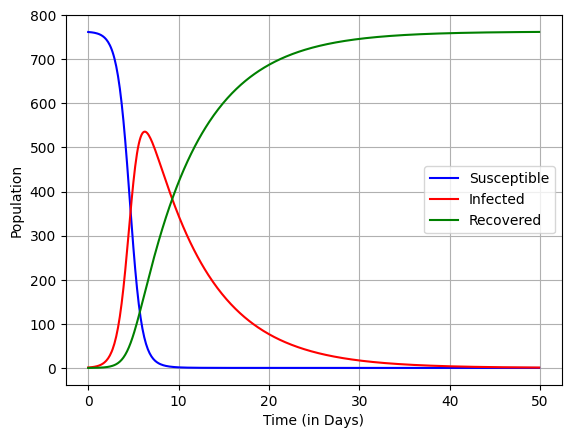

In [ ]:
rate_of_infection = 0.00218
rate_of_recovery = 0.15

S = 762  #Initial Value of S (Initially the entire population is susceptible)
I = 1
R = 0
delT = 0.1
N = S + I + R

time = []
Susceptibles = []
Infected = []
Recovered = []


for i in np.arange(0, 50, delT):
  time = np.append(time, i)

  S_rem = (rate_of_infection*I*S)*delT
  Susceptibles = np.append(Susceptibles, S)
  S = (S - S_rem)

  Infected = np.append(Infected,I)
  I_rem = I*rate_of_recovery*delT
  I = I + S_rem - I_rem


  R = R + I_rem
  Recovered = np.append(Recovered, R)

print(S+I+R)
plt.plot(time, Susceptibles, 'b', label='Susceptible')
plt.plot(time, Infected, 'r', label='Infected')
plt.plot(time, Recovered, 'g', label='Recovered')


plt.xlabel('Time (in Days)')
plt.ylabel('Population')
plt.grid(True)
plt.legend()

Now trying to adjust this model for immunisation of susceptible people.


2.1611599999999997
4.3037830200905915
7.898534234511725
13.34221001766309
20.67781134632296
29.24440196576803
37.48097531737379
43.239905095504035
44.74792877517727
41.658942453654156
35.23642527557145
27.478800212380442
20.069432776445506
13.918654592856457
9.265725885455112
5.968119494266837
3.7407307502811618
2.2910382501986404
1.3752978857086424
0.8111014856865443
762.9999999999998


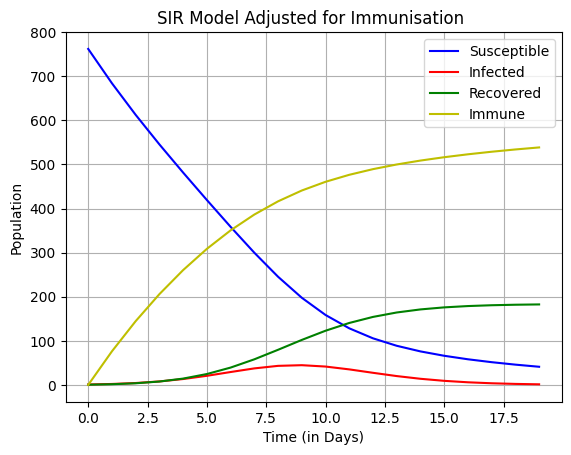

In [ ]:
rate_of_infection = 0.00218
rate_of_recovery = 0.5
rate_of_immunisation = 0.10


S = 762  #Initial Value of S (Initially the entire population is susceptible)
I = 1
R = 0
V = 0
delT = 1
N = S + I + R + V

time = []
Susceptibles = []
Infected = []
Recovered = []
Vaccinated = []


for i in np.arange(0, 20, delT):
  time = np.append(time, i)
  infected = (rate_of_infection*I*S)*delT

  S_rem = infected + rate_of_immunisation*S*delT
  Susceptibles = np.append(Susceptibles, S)
  Vaccinated = np.append(Vaccinated, V)
  V = V + rate_of_immunisation*S*delT

  S = (S - S_rem)

  Infected = np.append(Infected,I)
  I_rem = I*rate_of_recovery*delT
  I = I + infected - I_rem
  print(I)

  R = R + I_rem
  Recovered = np.append(Recovered, R)


print(S+I+R+V)
plt.plot(time, Susceptibles, 'b', label='Susceptible')
plt.plot(time, Infected, 'r', label='Infected')
plt.plot(time, Recovered, 'g', label='Recovered')
plt.plot(time, Vaccinated, 'y', label='Immune')
plt.xlabel('Time (in Days)')
plt.ylabel('Population')
plt.grid(True)
plt.title('SIR Model Adjusted for Immunisation ')
plt.legend()

Now, taking into account for immunisation to begin after 3 days of vaccination.

27.84265345493828 691.6430306913604 6.142763379013818


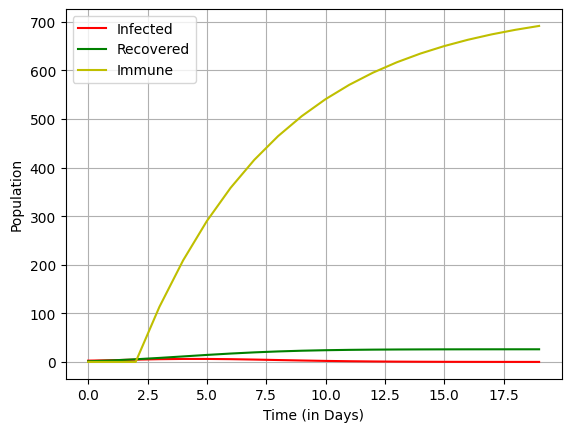

In [ ]:
rate_of_infection = 0.00218
rate_of_recovery = 0.5
rate_of_immunisation = 0.15


S = 762  #Initial Value of S (Initially the entire population is susceptible)
V1 = 0
V2 = 0
V3 = 0
I = 1
Im = 0
R = 0
delT = 1

time = []
Susceptibles = []
Vaccinated1 = []
Vaccinated2 = []
Vaccinated3 = []
Immunated = []
Infected = []
Recovered = []


for i in np.arange(0,20,delT):
  time = np.append(time, i)
  Im = Im + V3
  Immunated = np.append(Immunated, Im)
  V3 = V2
  V2 = V1

  # Vaccinated but they are susceptibles
  V1 = rate_of_immunisation * S * delT
  S = S - V1


  Vaccinated1 = np.append(Vaccinated1, V1)
  Vaccinated2 = np.append(Vaccinated2, V2)
  Vaccinated3 = np.append(Vaccinated3, V3)

  # Infection from susceptibles
  I0 = (rate_of_infection*I*S)*delT
  S = S - I0
  Susceptibles = np.append(Susceptibles, S)


  # Infection from Vaccinated
  I1 = (rate_of_infection*I*V1) * delT
  I2 = (rate_of_infection*I*V2) * delT
  I3 = (rate_of_infection*I*V3) * delT

  V1 = V1 - I1
  V2 = V2 - I2
  V3 = V3 - I3
  I = I + I1 + I2 + I3 + I0
  Infected = np.append(Infected, I)

  I_rem = I*rate_of_recovery*delT
  I = I - I_rem
  R = R + I_rem

  Recovered = np.append(Recovered, R)

print(S, Im, np.max(Infected))
plt.plot(time, Infected, 'r', label='Infected')
plt.plot(time, Recovered, 'g', label='Recovered')
# plt.xlabel('Time (in Days)')
# plt.ylabel('Population')
# plt.grid(True)
# plt.legend()
# # plt.show()
plt.plot(time, Immunated, 'y', label='Immune')
plt.xlabel('Time (in Days)')
plt.ylabel('Population')
plt.grid(True)
plt.legend()

### Simulating Q3 of the exercise

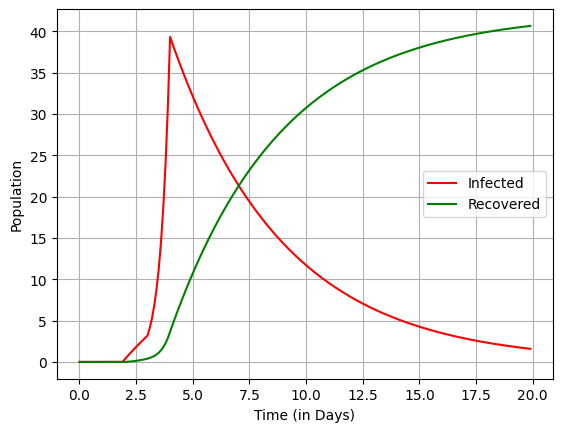

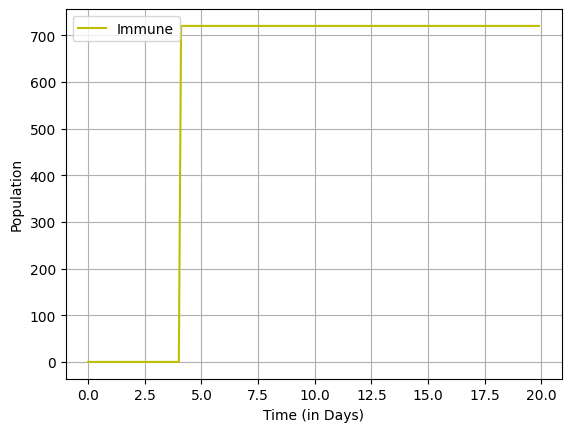

In [ ]:
rate_of_infection = 0.00418
rate_of_recovery = 0.2
# rate_of_immunisation = 0.15


S = 762  #Initial Value of S (Initially the entire population is susceptible)
I = 0
Imm = 0
R = 0
V1 = S
V2 = 0 #We have vaccinated everyone initially
delT = 0.1
N = S + I + R

time = []
Susceptibles = []
Infected = []
Recovered = []
Immune = []


for i in np.arange(0, 20, delT):
  time = np.append(time, i)

  if(i<2):
    Immune = np.append(Immune, V2)

  if(i>=2 and i<=3):
    I_in=1
    infected1 = (rate_of_infection*V1*I_in)*delT
    # print(infected1)
    V1 = V1 - infected1
    I = I + infected1
    I_in = I
    V2 = V1
    Immune = np.append(Immune, 0)

  if(i>3 and i<=4):
    infected2 = (rate_of_infection*V2*I)*delT
    # print(infected2)
    V2 = V2 - infected2
    I = I + infected2
    Immune = np.append(Immune, 0)

  if(i>4):
    Imm = V2
    Immune = np.append(Immune, Imm)


  Infected = np.append(Infected,I)
  I_rem = I*rate_of_recovery*delT
  I = I - I_rem

  R = R + I_rem
  Recovered = np.append(Recovered, R)



plt.plot(time, Infected, 'r', label='Infected')
plt.plot(time, Recovered, 'g', label='Recovered')
plt.xlabel('Time (in Days)')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(time, Immune, 'y', label='Immune')
plt.xlabel('Time (in Days)')
plt.ylabel('Population')
plt.grid(True)
plt.legend()

## Implementing Lab-6

In [ ]:
def theta(t, t_1, t_2, A):
  if (t >= t_1 and t <= t_2):
    return A

def transimission_coefficient(b_f, t, t1, t2, A):
  return (1 - theta(t, t1, t2, A)) * b_f

0.0015489467162329617 0.15 8.333333333333334
806.9999999999999


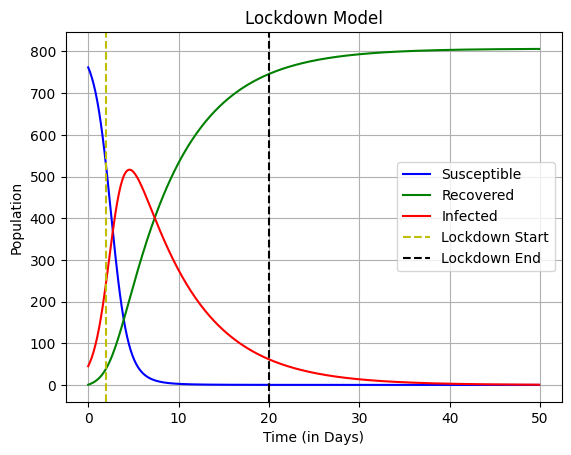

In [ ]:
rate_of_contact = 5
transmission_probability = 0.25
b_f = rate_of_contact * transmission_probability
alpha = 0.15 #Rate of recovery


# Intial values
S = 762  #Initial Value of S
I = 45
R = 0
delT = 0.1
N = S + I + R

# lockdown implemented at
t1 = 2
# to
t2 = 20

rate_of_infection = b_f / N
original_roi = rate_of_infection
rate_of_recovery = alpha
R_0 = b_f/alpha

print(rate_of_infection, rate_of_recovery, R_0)

time = []
Susceptibles = []
Infected = []
Recovered = []


for i in np.arange(0, 50, delT):
  time = np.append(time, i)

  if (i >= t1 and i <= t2):
    b_f = transimission_coefficient(b_f, i, t1, t2, A)
    rate_of_infection = b_f / N
    R_0 = b_f/alpha
    # print(rate_of_infection, R_0)
  else :
    rate_of_infection = original_roi

  # if (i % 1 == 0):
  #   print(rate_of_infection, i)


  S_rem = (rate_of_infection*I*S)*delT
  Susceptibles = np.append(Susceptibles, S)
  S = (S - S_rem)

  Infected = np.append(Infected,I)
  I_rem = I*rate_of_recovery*delT
  I = I + S_rem - I_rem


  R = R + I_rem
  Recovered = np.append(Recovered, R)

print(S+I+R)
plt.plot(time, Susceptibles, 'b', label='Susceptible')
plt.plot(time, Recovered, 'g', label='Recovered')
plt.plot(time, Infected, 'r', label='Infected')
plt.axvline(x=t1, color='y', ls='--', label='Lockdown Start')
plt.axvline(x=t2, color='k', ls='--', label='Lockdown End')
plt.xlabel('Time (in Days)')
plt.ylabel('Population')
plt.title('Lockdown Model')
plt.grid(True)
plt.legend()

Now we freeze the duration of lockdown and start-time and end-time, varying A (lockdown) severity, we plot A vs Peak Value and Peak Time

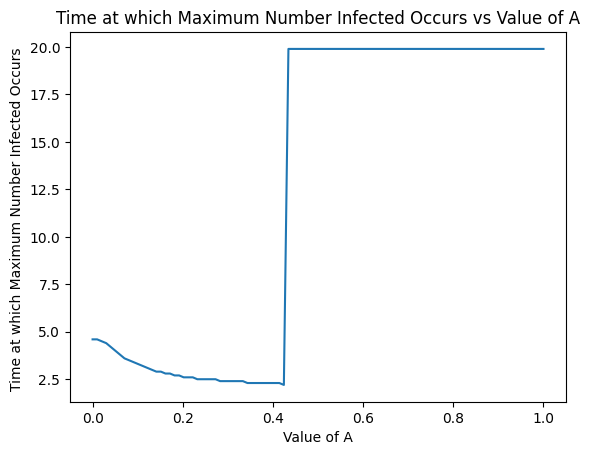

Text(0.5, 1.0, 'Maximum Number of Infected vs Value of A')

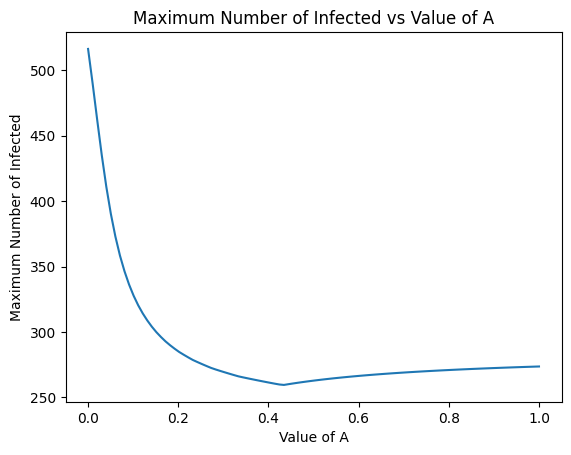

In [ ]:
lockdown_sev = np.linspace(0, 1, 100)
peak_time = []
peak_value = []

for j in lockdown_sev:
  rate_of_contact = 5
  transmission_probability = 0.25
  b_f = rate_of_contact * transmission_probability
  alpha = 0.15 #Rate of recovery
  A = j

  # Intial values+
  S = 762  #Initial Value of S (Initially the entire population is susceptible)
  I = 45
  R = 0
  delT = 0.1
  N = S + I + R

  # lockdown implemented at
  t1 = 2
  # to
  t2 = 15

  rate_of_infection = b_f / N
  original_roi = rate_of_infection
  rate_of_recovery = alpha
  R_0 = b_f/alpha
  # print(rate_of_infection, rate_of_recovery, R_0)

  time = []
  Susceptibles = []
  Infected = []
  Recovered = []

  for i in np.arange(0, 20, delT):
    time = np.append(time, i)

    if (i >= t1 and i <= t2):
      b_f = transimission_coefficient(b_f, i, t1, t2, A)
      rate_of_infection = b_f / N
      R_0 = b_f/alpha
      # print(rate_of_infection, R_0)
    else :
      rate_of_infection = original_roi

    # if (i % 1 == 0):
    #   print(rate_of_infection, i)

    S_rem = (rate_of_infection*I*S)*delT
    Susceptibles = np.append(Susceptibles, S)
    S = (S - S_rem)

    Infected = np.append(Infected,I)
    I_rem = I*rate_of_recovery*delT
    I = I + S_rem - I_rem

    R = R + I_rem
    Recovered = np.append(Recovered, R)

  peak_time = np.append(peak_time, np.argmax(Infected) * delT )
  peak_value = np.append(peak_value, np.max(Infected))

plt.plot(lockdown_sev, peak_time)
plt.xlabel('Value of A')
plt.ylabel('Time at which Maximum Number Infected Occurs ')
plt.title('Time at which Maximum Number Infected Occurs vs Value of A')
plt.show()
plt.plot(lockdown_sev, peak_value)
plt.xlabel('Value of A')
plt.ylabel('Maximum Number of Infected')
plt.title('Maximum Number of Infected vs Value of A')

In [ ]:
R = 8.333333333333334
imax = 1 - (1+np.log(R))/R
print(imax)
print(np.max(Infected)/N)

0.6255683756559891
0.6392541997539862
